In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("placement.csv")
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 18.5+ KB


In [4]:
df.shape

(215, 15)

# factor influnced by a candidate

In [5]:
mean=df.groupby('gender')['salary'].mean()
mean

gender
F    267291.666667
M    298910.000000
Name: salary, dtype: float64

In [6]:
median=df.groupby('gender')['salary'].median()
median

gender
F    250000.0
M    270000.0
Name: salary, dtype: float64

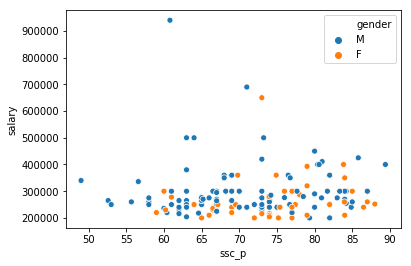

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=df['ssc_p'],y=df['salary'],hue=df['gender'])
plt.show()

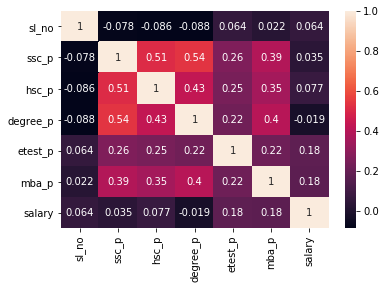

In [10]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

# which degree is more demanded

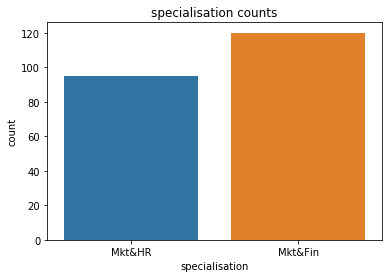

In [11]:
sns.countplot(x='specialisation',data=df)
plt.title("specialisation counts")
plt.xlabel("specialisation")
plt.ylabel("count")
plt.show()

# play to conduct with all stastical test

In [12]:
df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [13]:
from scipy import stats

In [14]:
stats.ttest_ind(df['sl_no'],df['etest_p'])
from scipy.stats import f_oneway
f_oneway(df['sl_no'],df['etest_p'])

F_onewayResult(statistic=68.47957104203799, pvalue=1.6447739006573659e-15)